params: 24,025,600
--------------------------------------------------
(363, 338, 3)


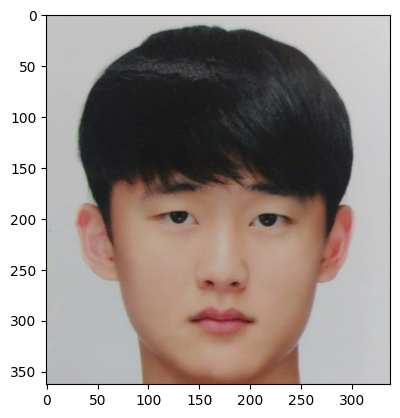

torch.Size([1, 3, 112, 112])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


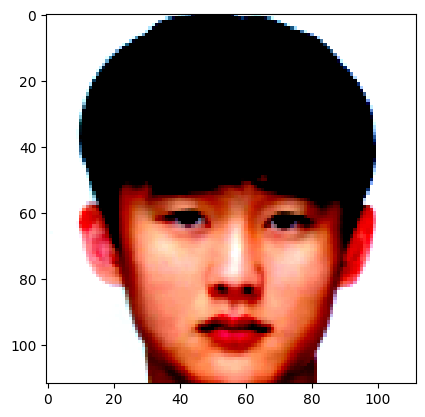

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


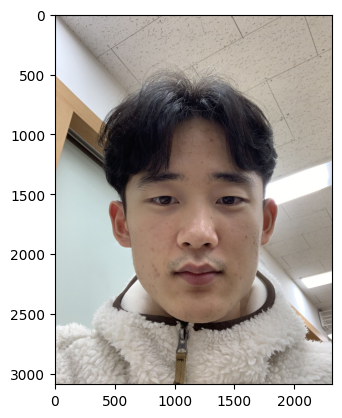

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


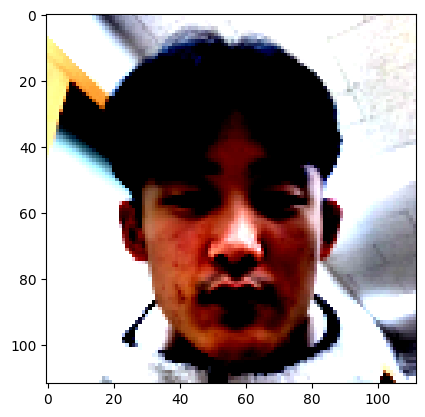

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(2560, 1920, 3)


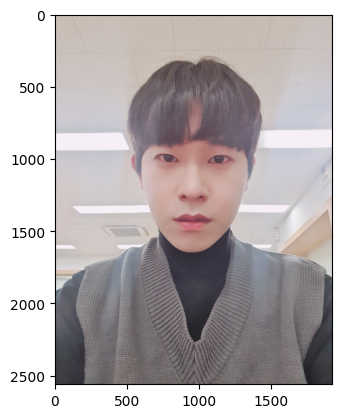

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


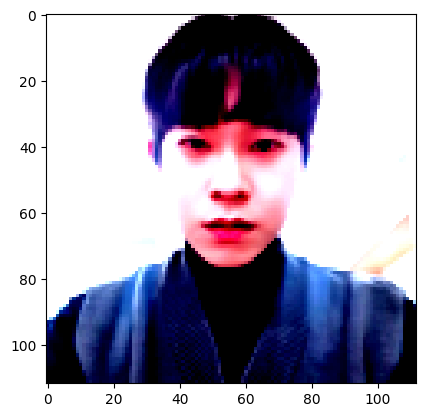

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


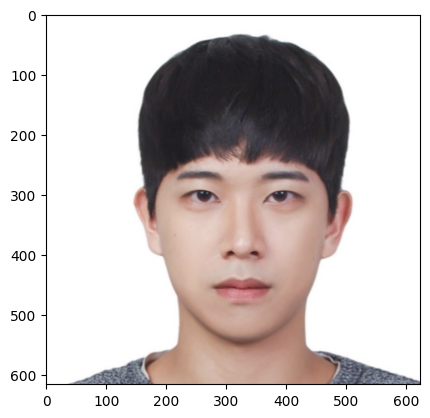

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


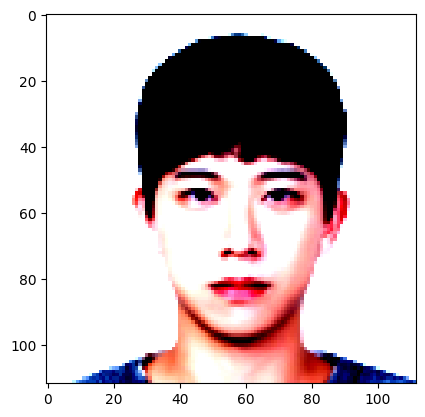

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])


In [8]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torch.utils.checkpoint import checkpoint
from torchvision import transforms

# # base_dir = os.path.dirname(__file__)
# base_dir = "C:/Users/gmk_0/source/repos/pythonProject/IT2/Computer-Vision-Project"
# __all__ = ['iresnet18', 'iresnet34', 'iresnet50', 'iresnet100', 'iresnet200']
# using_ckpt = False

# def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
#     """3x3 convolution with padding"""
#     return nn.Conv2d(in_planes,
#                      out_planes,
#                      kernel_size=3,
#                      stride=stride,
#                      padding=dilation,
#                      groups=groups,
#                      bias=False,
#                      dilation=dilation)


# def conv1x1(in_planes, out_planes, stride=1):
#     """1x1 convolution"""
#     return nn.Conv2d(in_planes,
#                      out_planes,
#                      kernel_size=1,
#                      stride=stride,
#                      bias=False)


# class IBasicBlock(nn.Module):
#     expansion = 1
#     def __init__(self, inplanes, planes, stride=1, downsample=None,
#                  groups=1, base_width=64, dilation=1):
#         super(IBasicBlock, self).__init__()
#         if groups != 1 or base_width != 64:
#             raise ValueError('BasicBlock only supports groups=1 and base_width=64')
#         if dilation > 1:
#             raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
#         self.bn1 = nn.BatchNorm2d(inplanes, eps=1e-05,)
#         self.conv1 = conv3x3(inplanes, planes)
#         self.bn2 = nn.BatchNorm2d(planes, eps=1e-05,)
#         self.prelu = nn.PReLU(planes)
#         self.conv2 = conv3x3(planes, planes, stride)
#         self.bn3 = nn.BatchNorm2d(planes, eps=1e-05,)
#         self.downsample = downsample
#         self.stride = stride

#     def forward_impl(self, x):
#         identity = x
#         out = self.bn1(x)
#         out = self.conv1(out)
#         out = self.bn2(out)
#         out = self.prelu(out)
#         out = self.conv2(out)
#         out = self.bn3(out)
#         if self.downsample is not None:
#             identity = self.downsample(x)
#         out += identity
#         return out        

#     def forward(self, x):
#         if self.training and using_ckpt:
#             return checkpoint(self.forward_impl, x)
#         else:
#             return self.forward_impl(x)


# class IResNet(nn.Module):
#     fc_scale = 7 * 7
#     def __init__(self,
#                  block, layers, dropout=0, num_features=512, zero_init_residual=False,
#                  groups=1, width_per_group=64, replace_stride_with_dilation=None, fp16=False):
#         super(IResNet, self).__init__()
#         self.extra_gflops = 0.0
#         self.fp16 = fp16
#         self.inplanes = 64
#         self.dilation = 1
#         if replace_stride_with_dilation is None:
#             replace_stride_with_dilation = [False, False, False]
#         if len(replace_stride_with_dilation) != 3:
#             raise ValueError("replace_stride_with_dilation should be None "
#                              "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
#         self.groups = groups
#         self.base_width = width_per_group
#         self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=3, stride=1, padding=1, bias=False)
#         self.bn1 = nn.BatchNorm2d(self.inplanes, eps=1e-05)
#         self.prelu = nn.PReLU(self.inplanes)
#         self.layer1 = self._make_layer(block, 64, layers[0], stride=2)
#         self.layer2 = self._make_layer(block,
#                                        128,
#                                        layers[1],
#                                        stride=2,
#                                        dilate=replace_stride_with_dilation[0])
#         self.layer3 = self._make_layer(block,
#                                        256,
#                                        layers[2],
#                                        stride=2,
#                                        dilate=replace_stride_with_dilation[1])
#         self.layer4 = self._make_layer(block,
#                                        512,
#                                        layers[3],
#                                        stride=2,
#                                        dilate=replace_stride_with_dilation[2])
#         self.bn2 = nn.BatchNorm2d(512 * block.expansion, eps=1e-05,)
#         self.dropout = nn.Dropout(p=dropout, inplace=True)
#         self.fc = nn.Linear(512 * block.expansion * self.fc_scale, num_features)
#         self.features = nn.BatchNorm1d(num_features, eps=1e-05)
#         nn.init.constant_(self.features.weight, 1.0)
#         self.features.weight.requires_grad = False

#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 nn.init.normal_(m.weight, 0, 0.1)
#             elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
#                 nn.init.constant_(m.weight, 1)
#                 nn.init.constant_(m.bias, 0)

#         if zero_init_residual:
#             for m in self.modules():
#                 if isinstance(m, IBasicBlock):
#                     nn.init.constant_(m.bn2.weight, 0)

#     def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
#         downsample = None
#         previous_dilation = self.dilation
#         if dilate:
#             self.dilation *= stride
#             stride = 1
#         if stride != 1 or self.inplanes != planes * block.expansion:
#             downsample = nn.Sequential(
#                 conv1x1(self.inplanes, planes * block.expansion, stride),
#                 nn.BatchNorm2d(planes * block.expansion, eps=1e-05, ),
#             )
#         layers = []
#         layers.append(
#             block(self.inplanes, planes, stride, downsample, self.groups,
#                   self.base_width, previous_dilation))
#         self.inplanes = planes * block.expansion
#         for _ in range(1, blocks):
#             layers.append(
#                 block(self.inplanes,
#                       planes,
#                       groups=self.groups,
#                       base_width=self.base_width,
#                       dilation=self.dilation))

#         return nn.Sequential(*layers)

#     def forward(self, x):
#         # with torch.cuda.amp.autocast(self.fp16):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.prelu(x)
#         x = self.layer1(x)
#         # print("-"*50)
#         # print(x.shape)
#         x = self.layer2(x)
#         # print(x.shape)
#         x = self.layer3(x)
#         # print(x.shape)
#         x = self.layer4(x)
#         # print(x.shape)
#         x = self.bn2(x)
#         x = torch.flatten(x, 1)
#         x = self.dropout(x)
#         # print(x.shape)
#         x = self.fc(x.float() if self.fp16 else x)
#         # print(x.shape)
#         x = self.features(x)
#         # print(x.shape)
#         # print("-"*50)
#         return x


# def _iresnet(arch, block, layers, pretrained, progress, **kwargs):
#     model = IResNet(block, layers, **kwargs)
#     if pretrained:
#         raise ValueError()
#     return model
# def iresnet18(pretrained=False, progress=True, **kwargs):
#     return _iresnet('iresnet18', IBasicBlock, [2, 2, 2, 2], pretrained,
#                     progress, **kwargs)
# def iresnet34(pretrained=False, progress=True, **kwargs):
#     return _iresnet('iresnet34', IBasicBlock, [3, 4, 6, 3], pretrained,
#                     progress, **kwargs)
# def iresnet50(pretrained=False, progress=True, **kwargs):
#     return _iresnet('iresnet50', IBasicBlock, [3, 4, 14, 3], pretrained,
#                     progress, **kwargs)


# back = torch.load(os.path.join(base_dir,"weights/backbone-r18.pth"), map_location=torch.device("cpu"))
# model = iresnet18()
# model.load_state_dict(back)

# print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))
# print(model)
# inputs = torch.randn((1,3,112,112))
# img = Image.open(os.path.join(base_dir,"images/jaejung.jpg"))

from model import get_model
model = get_model()

vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    max_size = max(np_img.shape[0:-1])
    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    print(torch_img.shape)
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("inputs shape:", torch_img.shape)
    
    with torch.no_grad():
        model.eval()
        outputs = model(torch_img)
    print("outputs shape:", outputs.shape)
    vector_list.append(outputs)

In [5]:
def euclidean(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return torch.sqrt(torch.pow(x-y,2)).sum()

print(euclidean(vector_list[0],vector_list[1]))
print(euclidean(vector_list[0],vector_list[2]))
print(euclidean(vector_list[0],vector_list[3]))
print()
print(euclidean(vector_list[2],vector_list[3]))
print(euclidean(vector_list[2],vector_list[0]))
print(euclidean(vector_list[2],vector_list[1]))

tensor(366.5707)
tensor(416.8451)
tensor(484.6915)

tensor(357.6090)
tensor(416.8451)
tensor(375.3407)


In [6]:
def cos_sim(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return x@y.T / torch.norm(x)*torch.norm(y)
    
print(cos_sim(vector_list[0],vector_list[1]))
print(cos_sim(vector_list[0],vector_list[2]))
print(cos_sim(vector_list[0],vector_list[3]))
print()
print(cos_sim(vector_list[2],vector_list[3]))
print(cos_sim(vector_list[2],vector_list[0]))
print(cos_sim(vector_list[2],vector_list[1]))

tensor([[126.6876]])
tensor([[2.3621]])
tensor([[5.8941]])

tensor([[52.9290]])
tensor([[6.7152]])
tensor([[1.6669]])


In [59]:
# print(torch.pow(torch.tensor([4,2]),2))
# print(torch.sqrt(torch.tensor([4,2])))
# print(torch.tensor([4,2]).sum())
x = torch.tensor([[1.,2.]])
y = torch.tensor([[2.,2.]])
print(torch.norm(x))
print(torch.norm(y))
# print(y.shape)
# print(y.view(-1).shape)
# print(x.view(-1).dot(y.view(-1)))
print(x@y.T)

tensor(2.2361)
tensor(2.8284)
tensor([[6.]])


In [72]:
x = torch.tensor([1.,2.])
y = torch.tensor([2.,2.])
print(x@y.T)
print(x.dot(y))

tensor(6.)
tensor(6.)


In [81]:
from torchvision import models
# model = models.resnet18(models.ResNet18_Weights.DEFAULT)
# print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))
# x = torch.randn((3,3,224,224))
x = np.random.random((3,3,224,224))
print(torch.from_numpy(x).shape)
# print(model)

torch.Size([3, 3, 224, 224])


In [24]:
print(np_img.shape)
print(max(np_img.shape))

(3088, 2316, 3)
3088


In [22]:
max([1,2,4,2])

4